# Capstone Project

--- 
Omar Lopez Bejerano

November, 2025

---
## Section 1.1
This section is for starting to work with the dataset, some initial visualization

**Dataset Structure and Initial Setup**
- The dataset is located in the "MIMIC-BP" folder, organized in 5 categories/folders, including 'abp', 'ecg', 'ppg', and 'resp', each containing .npy files for each patient.
- Each .npy file contains a 2D NumPy array with 30 segments of physiological signals.
- Each segment is 30 seconds long, sampled at 125 Hz, resulting in arrays of shape (30, 3750).
- The 'labels' folder contains .npy files with corresponding blood pressure readings for each segment.
- Additionally, we have txt files listing patient IDs for training, validation, and testing splits.

Each of the 1,524 patients is associated with 5 data files corresponding to the ABP, ECG, PPG and RESP signals, and, additionally, a file containing the median SBP and DBP values for each of the 30 segments. All files present the same name structure: the subject’s anonymized ID followed by the name of the signal, e.g., for patient p093833, the name of the file containing their ECG data is p093833_ecg.npy.

In [ ]:
## npy files mean that they are saved in NumPy array format
# The following code snippet shows how to load and visualize the data for a specific patient and segment.
# You can change the 'dbPath', 'patient', and 'idx' variables to load different data.
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


In [ ]:
dbPath = 'MIMIC-BP/'

####### Dataset Overview and Statistics ########

# Collect file counts for each signal type
signal_types = ['ecg', 'abp', 'ppg', 'resp', 'labels']
file_counts = {}

for signal in signal_types:
    folder_path = os.path.join(dbPath, signal)
    if os.path.exists(folder_path):
        num_files = len([f for f in os.listdir(folder_path) if os.path.isfile(os.path.join(folder_path, f))])
        file_counts[signal] = num_files
    else:
        file_counts[signal] = 0

# Load train/val/test splits (stored as Python lists in text files)
import ast

with open(os.path.join(dbPath, 'train_subjects.txt'), 'r') as f:
    train_subjects = ast.literal_eval(f.read())

with open(os.path.join(dbPath, 'val_subjects.txt'), 'r') as f:
    val_subjects = ast.literal_eval(f.read())

with open(os.path.join(dbPath, 'test_subjects.txt'), 'r') as f:
    test_subjects = ast.literal_eval(f.read())

# Load a sample file to get dimensions
sample_patient = train_subjects[0]
sample_ecg = np.load(os.path.join(dbPath, 'ecg', f'{sample_patient}_ecg.npy'))
sample_labels = np.load(os.path.join(dbPath, 'labels', f'{sample_patient}_labels.npy'))

# Calculate total patients
total_patients = len(train_subjects) + len(val_subjects) + len(test_subjects)

# Create comprehensive dataset overview
dataset_info = {
    'Category': [
        'Total Patients',
        'Training Patients',
        'Validation Patients',
        'Test Patients',
        '',
        'ECG Files',
        'ABP Files',
        'PPG Files',
        'RESP Files',
        'Label Files',
        '',
        'Segments per Patient',
        'Segment Duration (seconds)',
        'Sampling Frequency (Hz)',
        'Samples per Segment',
        'Signal Shape',
        'Label Shape',
        '',
        'Total Recording Time per Patient (min)',
        'Total Segments (all patients)',
        'Total Data Points per Signal Type',
    ],
    'Value': [
        total_patients,
        len(train_subjects),
        len(val_subjects),
        len(test_subjects),
        '',
        file_counts['ecg'],
        file_counts['abp'],
        file_counts['ppg'],
        file_counts['resp'],
        file_counts['labels'],
        '',
        sample_ecg.shape[0],
        30,
        125,
        sample_ecg.shape[1],
        f"{sample_ecg.shape}",
        f"{sample_labels.shape}",
        '',
        (sample_ecg.shape[0] * 30) / 60,
        total_patients * sample_ecg.shape[0],
        f'{total_patients * sample_ecg.shape[0] * sample_ecg.shape[1]:,}',
    ],
    'Description': [
        'Total unique patients in dataset',
        f'{len(train_subjects)/total_patients*100:.1f}% of total',
        f'{len(val_subjects)/total_patients*100:.1f}% of total',
        f'{len(test_subjects)/total_patients*100:.1f}% of total',
        '',
        'Electrocardiogram signal files',
        'Arterial Blood Pressure signal files',
        'Photoplethysmogram signal files',
        'Respiratory signal files',
        'Blood pressure label files (SBP/DBP)',
        '',
        'Number of 30-second segments per patient',
        'Duration of each recording segment',
        'Signals sampled at 125 Hz',
        '30 seconds x 125 Hz = 3750 samples',
        '(segments, samples) per patient file',
        '(segments, 2) - SBP and DBP values',
        '',
        f'{sample_ecg.shape[0]} segments x 30 seconds',
        f'{sample_ecg.shape[0]} segments x {total_patients:,} patients',
        'Total samples across all patients',
    ]
}

# Create and display the table
df_overview = pd.DataFrame(dataset_info)

print("=" * 105)
print("MIMIC-BP DATASET OVERVIEW".center(105))
print("=" * 105)
print()

# Print table with fixed column widths
col_widths = [40, 40, 40]  # Category, Value, Description
print(f"{'Category':<{col_widths[0]}} {'Value':>{col_widths[1]}} {'Description':<{col_widths[2]}}")
print("-" * 105)

for idx, row in df_overview.iterrows():
    cat = str(row['Category'])
    val = str(row['Value'])
    desc = str(row['Description'])
    print(f"{cat:<{col_widths[0]}} {val:>{col_widths[1]}} {desc:<{col_widths[2]}}")

print("=" * 105)

# Additional statistics
print("\nDATA SPLIT SUMMARY:")
print(f"Training: {len(train_subjects):4d} patients ({len(train_subjects)/total_patients*100:5.2f}%)")
print(f"Validation: {len(val_subjects):4d} patients ({len(val_subjects)/total_patients*100:5.2f}%)")
print(f"Test: {len(test_subjects):4d} patients ({len(test_subjects)/total_patients*100:5.2f}%)")
print(f"Total: {total_patients:4d} patients")
print()
print("DATA COMPLETENESS CHECK:")
all_complete = all(v == file_counts['ecg'] for v in file_counts.values())
for signal, count in file_counts.items():
    status = "✓" if count == total_patients else "✗"
    print(f"{status} {signal.upper():7s}: {count:4d} files (expected {total_patients:4d})")
print()
if all_complete and file_counts['ecg'] == total_patients:
    print("✓ Dataset is COMPLETE - all signal types have files for all patients")
else:
    print("✗ Dataset is INCOMPLETE - some files are missing")

In [54]:
## Show 1 example from each data type displayed as pandas dataframe
# Load one example file from each signal type
patient = 'p000188'

# Load each signal type
ecg_data = np.load(os.path.join(dbPath, 'ecg', f'{patient}_ecg.npy'))
abp_data = np.load(os.path.join(dbPath, 'abp', f'{patient}_abp.npy'))
ppg_data = np.load(os.path.join(dbPath, 'ppg', f'{patient}_ppg.npy'))
resp_data = np.load(os.path.join(dbPath, 'resp', f'{patient}_resp.npy'))
labels_data = np.load(os.path.join(dbPath, 'labels', f'{patient}_labels.npy'))

ecg_data_df = pd.DataFrame(ecg_data[0]).rename(columns={0: 'ECG Signal'})
abp_data_df = pd.DataFrame(abp_data[0]).rename(columns={0: 'ABP Signal'})
ppg_data_df = pd.DataFrame(ppg_data[0]).rename(columns={0: 'PPG Signal'})
resp_data_df = pd.DataFrame(resp_data[0]).rename(columns={0: 'RESP Signal'})
labels_data_df = pd.DataFrame(labels_data, columns=['SBP', 'DBP'])

## Table to display each as column
combined_df = pd.concat([ecg_data_df, abp_data_df, ppg_data_df, resp_data_df, labels_data_df], axis=1)
combined_df

,ECG Signal,ABP Signal,PPG Signal,RESP Signal,SBP,DBP
0,0.299951,86.629819,1.355816,0.218919,90.5,69.6
1,0.380068,85.809239,1.354839,0.210811,99.6,59.9
2,0.600147,84.988658,1.365591,0.202703,78.4,51.3
3,0.935027,84.226691,1.390029,0.194595,130.4,75.4
4,1.000244,83.406111,1.433040,0.186873,130.6,74.4
...,...,...,...,...,...,...
3745,0.279922,84.461143,1.175953,0.705792,NaN,NaN
3746,0.289936,83.933627,1.163245,0.691506,NaN,NaN
3747,0.390083,83.347498,1.152493,0.677606,NaN,NaN
3748,0.649976,82.526918,1.142717,0.663707,NaN,NaN


/var/folders/q8/flcppr9d1_96c9q6d5j30rfh0000gn/T/ipykernel_64303/1684262386.py:91: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


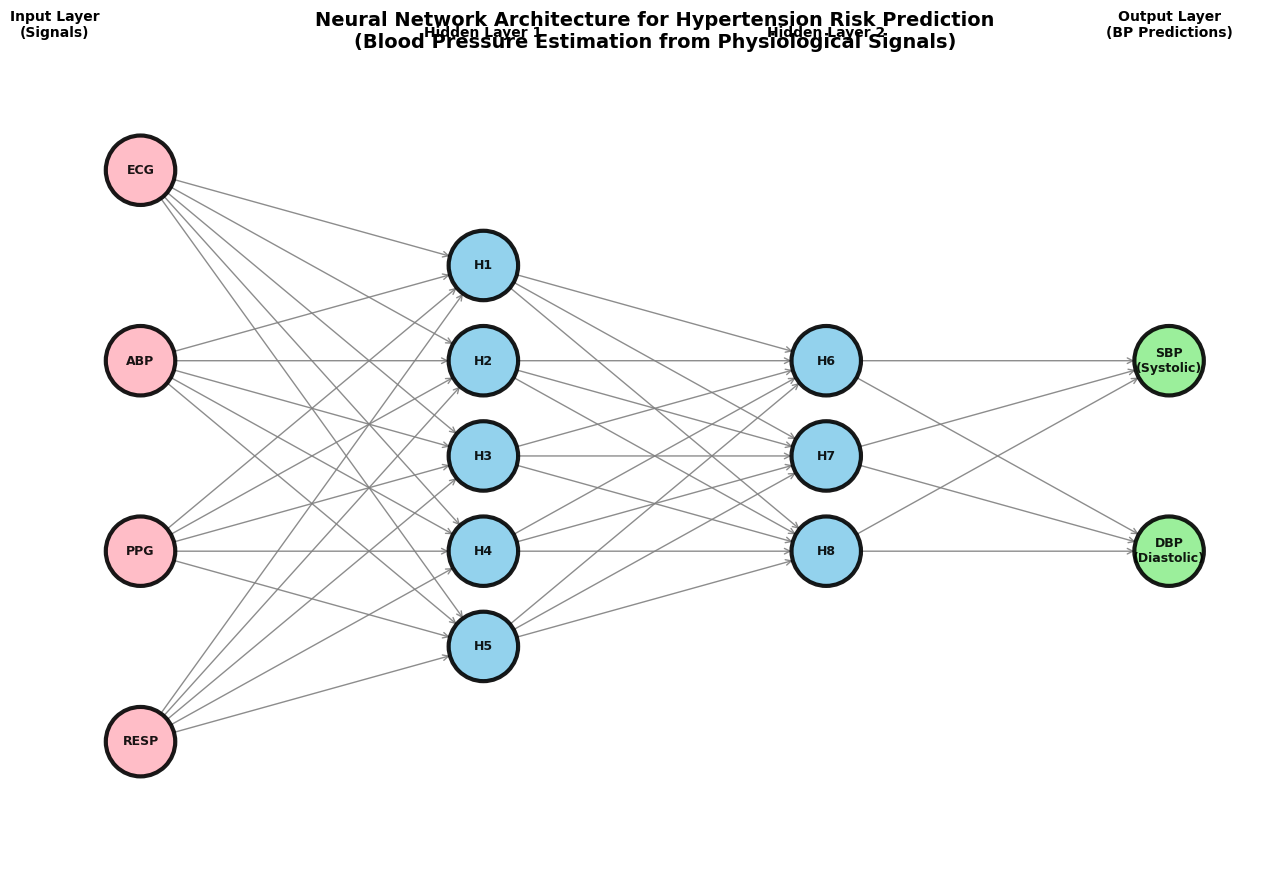


Model Architecture Summary:
  Input Features:  4 physiological signals (ECG, ABP, PPG, RESP)
  Hidden Layer 1:  5 neurons
  Hidden Layer 2:  3 neurons
  Output:          2 values (Systolic BP, Diastolic BP)

  Goal: Predict hypertension risk by estimating blood pressure
        from non-invasive physiological signal measurements


In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

# Neural Network Architecture for Hypertension Risk Prediction
G = nx.DiGraph()

# Input layer - physiological signals
G.add_node("ECG",   pos = (0, 3.5) )
G.add_node("ABP",   pos = (0, 2.5) )
G.add_node("PPG",   pos = (0, 1.5) )
G.add_node("RESP",  pos = (0, 0.5) )

# Hidden layers
G.add_node("H1",  pos = (2, 3.0) )
G.add_node("H2",  pos = (2, 2.5) )
G.add_node("H3",  pos = (2, 2.0) )
G.add_node("H4",  pos = (2, 1.5) )
G.add_node("H5",  pos = (2, 1.0) )

G.add_node("H6",  pos = (4, 2.5) )
G.add_node("H7",  pos = (4, 2.0) )
G.add_node("H8",  pos = (4, 1.5) )

# Output layer - Blood pressure predictions
G.add_node("SBP\n(Systolic)",  pos = (6, 2.5) )
G.add_node("DBP\n(Diastolic)", pos = (6, 1.5) )

# Connections from input to first hidden layer
input_nodes = ["ECG", "ABP", "PPG", "RESP"]
hidden_layer1 = ["H1", "H2", "H3", "H4", "H5"]
hidden_layer2 = ["H6", "H7", "H8"]
output_nodes = ["SBP\n(Systolic)", "DBP\n(Diastolic)"]

for input_node in input_nodes:
    for hidden_node in hidden_layer1:
        G.add_edge(input_node, hidden_node)

# Connections from first hidden layer to second hidden layer
for h1 in hidden_layer1:
    for h2 in hidden_layer2:
        G.add_edge(h1, h2)

# Connections from second hidden layer to output
for hidden_node in hidden_layer2:
    for output_node in output_nodes:
        G.add_edge(hidden_node, output_node)

# Draw the network
plt.figure(figsize=(12, 8))
pos = nx.get_node_attributes(G, 'pos')

# Color coding for different layer types
node_colors = []
for node in G.nodes():
    if node in input_nodes:
        node_colors.append("#FFB6C1")  # Light pink for inputs
    elif node in output_nodes:
        node_colors.append("#90EE90")  # Light green for outputs
    else:
        node_colors.append("#87CEEB")  # Sky blue for hidden layers

nx.draw(G,
        pos,
        with_labels=True,
        font_weight='bold',
        node_size = 2500,
        node_color = node_colors,
        linewidths = 3,
        font_size=9,
        edge_color='gray',
        alpha=0.9,
        arrows=True,
        arrowsize=10,
        arrowstyle='->')

ax = plt.gca()
ax.collections[0].set_edgecolor("#000000")
ax.set_xlim([-0.5, 6.5])
ax.set_ylim([-0.2, 4.0])

# Add title and layer labels
plt.title("Neural Network Architecture for Hypertension Risk Prediction\n(Blood Pressure Estimation from Physiological Signals)",
          fontsize=14, fontweight='bold', pad=20)
plt.text(-0.5, 4.2, "Input Layer\n(Signals)", fontsize=10, fontweight='bold', ha='center')
plt.text(2, 4.2, "Hidden Layer 1", fontsize=10, fontweight='bold', ha='center')
plt.text(4, 4.2, "Hidden Layer 2", fontsize=10, fontweight='bold', ha='center')
plt.text(6, 4.2, "Output Layer\n(BP Predictions)", fontsize=10, fontweight='bold', ha='center')

plt.axis('off')
plt.tight_layout()
plt.show()

print("\nModel Architecture Summary:")
print(f"  Input Features:  4 physiological signals (ECG, ABP, PPG, RESP)")
print(f"  Hidden Layer 1:  5 neurons")
print(f"  Hidden Layer 2:  3 neurons")
print(f"  Output:          2 values (Systolic BP, Diastolic BP)")
print(f"\n  Goal: Predict hypertension risk by estimating blood pressure")
print(f"        from non-invasive physiological signal measurements")